## Customer Details:

### Name- name of the customer
### CustomerID- Unique ID of a customer
### Age - The age of the individual
### Marital Status- Status of the customer( Married/Unmarried/Widow/Separated/Divorced)
### Gender - Gender of the individual 
### Ethnicity - Ethnicity of the individual
### Education - Education level


********************************************************************************************************************************

## Card Details:

### CustomerID- Unique ID of a customer 
### Income - Income of the individual (Lakhs)
### Limit  - Current credit card limit 
### Rating - Credit rating of the individual
### Cards - Number of cards the individual has
### Balance - Current account balance of the individual (Thousands)

--------------------------------------------------------------------------------------------------------------------------------

## Task -Data Cleaning & Visualization

#### Python

### The importance of data cleaning in the development of machine learning models cannot be overstated as it ensures that the model is trained on clean and unbiased data, resulting in more accurate predictions and decisions. By identifying and addressing errors and biases in the data, data cleaning plays a crucial role in enhancing the performance of machine learning models.

### -> Join datasets of different formats using Python based on common fields.
### -> Clean the data by removing duplicate, missing, and irrelevant values.
### -> Analyze the data to understand its characteristics and trends.
### -> Address any errors or inconsistencies in the data.
### -> Ensure that the data is suitable for analysis


## Importing the necessary Library

In [1]:
import pandas as pd
import numpy as np

## Reading the Data Sets

In [2]:
df1= pd.read_csv('Customer Details.csv', encoding = 'latin1')
df1.head()

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education
0,Katherine Bettcher,0002-ORFBO,30,Married,Male,Caucasian,Master
1,Alejandro Graham,0002-ORFBOA,71,Married,Male,Asian,Bachelor
2,Priscilla Ian,0002-ORFBOC,46,Seperated,Male,African American,Senior Secondary
3,Ovella,0002-ORFBOCH,42,Married,Female,Caucasian,Senior Secondary
4,Juliann,0002-ORFBOH,30,Married,Male,African American,Doctorate


In [3]:
df2= pd.read_csv('Card Details.csv')
df2.head()

,CustomerID,Income,Limit,Rating,Cards,Balance
0,0002-ORFBO,105.038,9142,734,3,232
1,0002-ORFBOA,69.820,4223,389,1,924
2,0002-ORFBOC,17.441,2430,253,1,20
3,0002-ORFBOCH,39.368,3829,248,3,813
4,0002-ORFBOH,56.375,2850,258,1,109


## Joining the two data sets

In [4]:
df_raw = pd.merge(df2, df1, on = 'CustomerID')

In [5]:
df_raw.head()

,CustomerID,Income,Limit,Rating,Cards,Balance,Name,Age,Marital Status,Gender,Ethnicity,Education
0,0002-ORFBO,105.038,9142,734,3,232,Katherine Bettcher,30,Married,Male,Caucasian,Master
1,0002-ORFBOA,69.820,4223,389,1,924,Alejandro Graham,71,Married,Male,Asian,Bachelor
2,0002-ORFBOC,17.441,2430,253,1,20,Priscilla Ian,46,Seperated,Male,African American,Senior Secondary
3,0002-ORFBOCH,39.368,3829,248,3,813,Ovella,42,Married,Female,Caucasian,Senior Secondary
4,0002-ORFBOH,56.375,2850,258,1,109,Juliann,30,Married,Male,African American,Doctorate


In [6]:
df_raw.shape

(32547, 12)

In [7]:
df = df_raw.copy()

**Dropping the Unnecessary columns**

In [8]:
df = df.drop('Name', axis = 'columns')

In [9]:
df = df.drop('CustomerID', axis = 'columns')

In [10]:
df

,Income,Limit,Rating,Cards,Balance,Age,Marital Status,Gender,Ethnicity,Education
0,105.038,9142,734,3,232,30,Married,Male,Caucasian,Master
1,69.820,4223,389,1,924,71,Married,Male,Asian,Bachelor
2,17.441,2430,253,1,20,46,Seperated,Male,African American,Senior Secondary
3,39.368,3829,248,3,813,42,Married,Female,Caucasian,Senior Secondary
4,56.375,2850,258,1,109,30,Married,Male,African American,Doctorate
...,...,...,...,...,...,...,...,...,...,...
32542,32.930,4222,308,4,162,34,Unmarried,Male,Caucasian,Bachelor
32543,12.469,5645,311,2,487,61,Married,Female,Caucasian,Senior High School
32544,64.167,3116,285,3,576,64,Unmarried,Male,Caucasian,Senior Secondary
32545,20.970,1356,161,2,0,77,Unmarried,Female,Caucasian,Bachelor


In [11]:
# Looking at the shape of the data
print('The Number of rows and columns present in the data set is: ',df.shape)

The Number of rows and columns present in the data set is:  (32547, 10)


In [12]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32547 entries, 0 to 32546
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          32547 non-null  float64
 1   Limit           32547 non-null  int64  
 2   Rating          32547 non-null  int64  
 3   Cards           32547 non-null  int64  
 4   Balance         32547 non-null  int64  
 5   Age             32547 non-null  int64  
 6   Marital Status  32547 non-null  object 
 7   Gender          32547 non-null  object 
 8   Ethnicity       32547 non-null  object 
 9   Education       32547 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.7+ MB


## Seperating the Categorical and Continuous Values

In [13]:
cat_vars = []
cont_vars = []

for i in df.columns:
    if df[i].dtypes=='object':
        cat_vars.append(i)
    else:
        cont_vars.append(i)
    
print("Categorical Variables: ",cat_vars)
print("Continuous Variables: ", cont_vars)

Categorical Variables:  ['Marital Status', 'Gender', 'Ethnicity', 'Education']
Continuous Variables:  ['Income', 'Limit', 'Rating', 'Cards', 'Balance', 'Age']


## Looking at the Unique and  Null values

In [14]:
for i in cat_vars:
    nunique=df[i].nunique()
    print("*************************************************")
    print(i)
    print("the number of unique levels are: ",nunique)
    print("\n")
    print(df[i].value_counts())
    print("\n")
    print("the number of Null values are: ", df[i].isnull().sum())

*************************************************
Marital Status
the number of unique levels are:  5


Unmarried    16829
Married      15621
Divorced        51
Seperated       37
Widow            9
Name: Marital Status, dtype: int64


the number of Null values are:  0
*************************************************
Gender
the number of unique levels are:  2


Female    16562
Male      15985
Name: Gender, dtype: int64


the number of Null values are:  0
*************************************************
Ethnicity
the number of unique levels are:  3


Caucasian           16380
Asian                8240
African American     7927
Name: Ethnicity, dtype: int64


the number of Null values are:  0
*************************************************
Education
the number of unique levels are:  8


Master                8781
Bachelor              7342
Senior Secondary      5270
Elementary            3793
Doctorate             2610
Senior High School    2553
Secondary             1733
High School 

In [15]:
for i in cont_vars:
    nunique=df[i].nunique()
    print("*************************************************")
    print(i)
    print("the number of unique levels are: ",nunique)
    print("\n")
    print(df[i].value_counts())
    print("\n")
    print("the number of Null values are: ", df[i].isnull().sum())

*************************************************
Income
the number of unique levels are:  24384


10.726     211
10.742     196
10.735     186
10.627     170
10.635     164
          ... 
119.753      1
39.689       1
44.158       1
50.156       1
64.167       1
Name: Income, Length: 24384, dtype: int64


the number of Null values are:  0
*************************************************
Limit
the number of unique levels are:  7443


1160     183
1300     176
10578    173
10673    168
1134     167
        ... 
9519       1
1679       1
8842       1
6358       1
9290       1
Name: Limit, Length: 7443, dtype: int64


the number of Null values are:  0
*************************************************
Rating
the number of unique levels are:  679


126    275
120    267
122    260
121    241
281    199
      ... 
804      1
749      1
801      1
794      1
740      1
Name: Rating, Length: 679, dtype: int64


the number of Null values are:  0
************************************************

## There are no Duplicate Values

In [16]:
df.duplicated().sum()

0

In [17]:
df.head(10)

,Income,Limit,Rating,Cards,Balance,Age,Marital Status,Gender,Ethnicity,Education
0,105.038,9142,734,3,232,30,Married,Male,Caucasian,Master
1,69.820,4223,389,1,924,71,Married,Male,Asian,Bachelor
2,17.441,2430,253,1,20,46,Seperated,Male,African American,Senior Secondary
3,39.368,3829,248,3,813,42,Married,Female,Caucasian,Senior Secondary
4,56.375,2850,258,1,109,30,Married,Male,African American,Doctorate
5,53.016,6136,574,2,438,52,Unmarried,Female,Caucasian,Elementary
6,48.586,5941,357,3,409,65,Married,Male,Caucasian,Senior High School
7,16.429,2594,120,4,0,25,Married,Female,African American,Bachelor
8,39.606,3796,215,3,29,37,Unmarried,Male,Caucasian,Senior Secondary
9,23.672,6164,417,4,1448,62,Unmarried,Male,Caucasian,Master


In [18]:
df.describe()

,Income,Limit,Rating,Cards,Balance,Age
count,32547.000000,32547.000000,32547.000000,32547.000000,32547.000000,32547.000000
mean,46.490372,4419.522322,326.720159,2.906658,447.894706,55.476419
std,37.140511,2202.441042,136.146945,1.325485,454.205934,16.990896
min,10.627000,1134.000000,119.000000,1.000000,0.000000,25.000000
25%,20.661500,2727.000000,224.000000,2.000000,5.000000,42.000000
50%,33.469000,4178.000000,316.000000,3.000000,331.000000,55.000000
75%,58.075000,5636.000000,405.000000,4.000000,749.000000,69.000000
max,160.231000,11200.000000,805.000000,7.000000,1597.000000,86.000000


In [19]:
df.describe(include = "O")

,Marital Status,Gender,Ethnicity,Education
count,32547,32547,32547,32547
unique,5,2,3,8
top,Unmarried,Female,Caucasian,Master
freq,16829,16562,16380,8781


## Renaming and combing the features in Marital Status column

In [20]:
df.rename(columns = {'Rating': 'Cibil_Score'},inplace = True)

In [21]:
df.rename(columns={"Marital Status":"Marital_Status"}, inplace = True)

In [22]:
df['Marital_Status'].value_counts()

Unmarried    16829
Married      15621
Divorced        51
Seperated       37
Widow            9
Name: Marital_Status, dtype: int64

## Rounding off Income by 2 decimal points.

In [23]:
df['Income']= round(df['Income'],2)

## Combining divorced and seperated as they both mean the same.

In [24]:
df.replace({'Marital_Status': {'Divorced':'Seperated'}},inplace = True)

In [25]:
df.Marital_Status.value_counts()

Unmarried    16829
Married      15621
Seperated       88
Widow            9
Name: Marital_Status, dtype: int64

## Checking if there are any outliers

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df.dtypes

Income            float64
Limit               int64
Cibil_Score         int64
Cards               int64
Balance             int64
Age                 int64
Marital_Status     object
Gender             object
Ethnicity          object
Education          object
dtype: object

<Axes: xlabel='Age'>

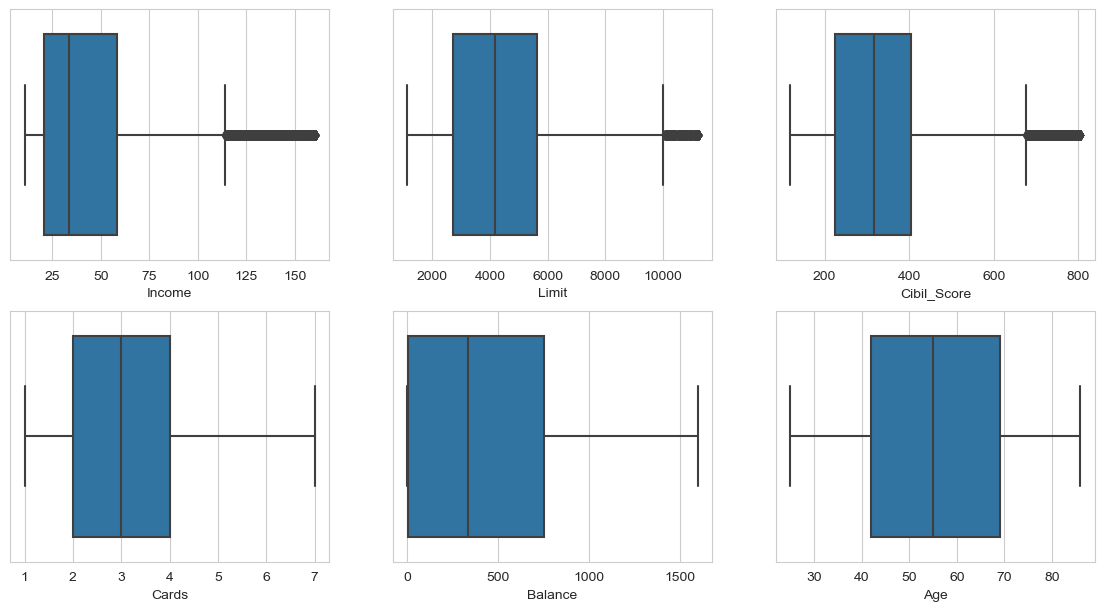

In [28]:
   # Setting up the plots
plt.figure(figsize=(14,15))
sns.set_style(style='whitegrid')

    # Plot 1 
plt.subplot(4,3,1)
sns.boxplot(x='Income',data=df)

    # Plot 2
plt.subplot(4,3,2)
sns.boxplot(x='Limit',data=df)

    # Plot 3 
plt.subplot(4,3,3)
sns.boxplot(x='Cibil_Score',data=df)

    # Plot 4
plt.subplot(4,3,4)
sns.boxplot(x='Cards',data=df)

    # Plot 5
plt.subplot(4,3,5)
sns.boxplot(x='Balance',data=df)

    # Plot 6 
plt.subplot(4,3,6)
sns.boxplot(x='Age',data=df)
    

### Seems like there are outliers in Income variable, but cant remove it as it could be actuals.

## Univariate Analysis on each of the Categorical Variables

C:\Users\Amit\AppData\Local\Temp\ipykernel_18136\4010065669.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
C:\Users\Amit\AppData\Local\Temp\ipykernel_18136\4010065669.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
C:\Users\Amit\AppData\Local\Temp\ipykernel_18136\4010065669.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
C:\Users\Amit\AppData\Local\Temp\ipykernel_18136\4010065669.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)


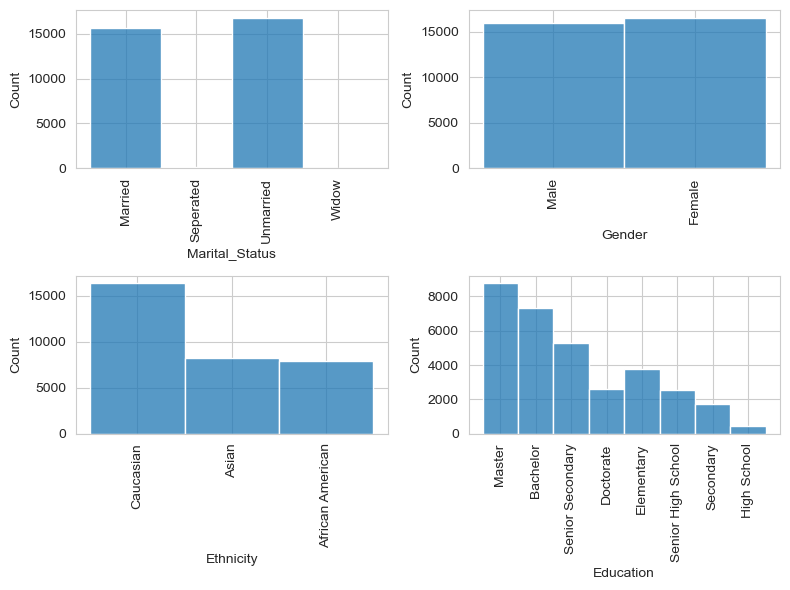

In [29]:
 ## list of categorical variables together
cat_vars = ['Marital_Status', 'Gender', 'Ethnicity', 'Education']

    ## create figure with subplots
fig, axs = plt.subplots(nrows=2,ncols = 2,figsize=(8,6))
axs = axs.flatten()

    ## create histplot for each categorical var
for i, var in enumerate(cat_vars):
    sns.histplot(x = var, data = df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

    ## adjusting spacing between  subplots 
fig.tight_layout()

plt.show()

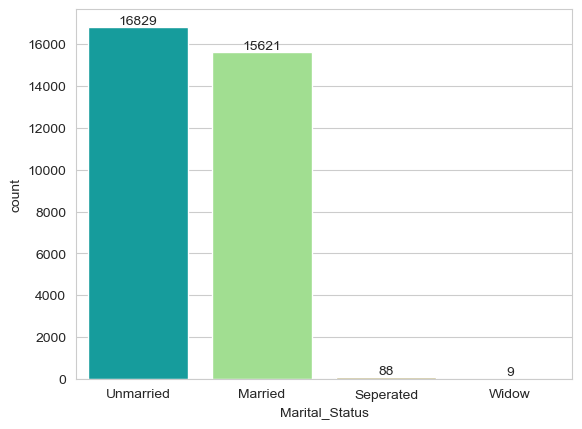

In [30]:
ax =sns.countplot(x = df['Marital_Status'],
                 order = df['Marital_Status'].value_counts(ascending = False).index, palette = 'terrain');

abs_values = df['Marital_Status'].value_counts(ascending = False).values

ax.bar_label(container=ax.containers[0], labels = abs_values);

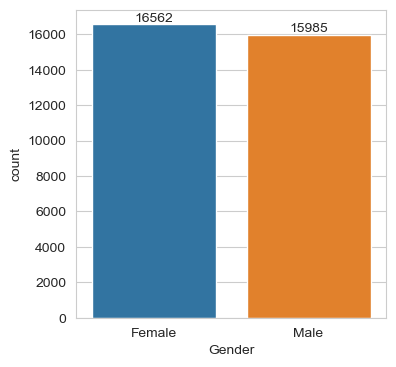

In [31]:
fig = plt.figure(figsize = (4,4))
ax = sns.countplot(x=df['Gender'],
                   order=df['Gender'].value_counts(ascending=False).index,);

abs_values = df['Gender'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

plt.show()

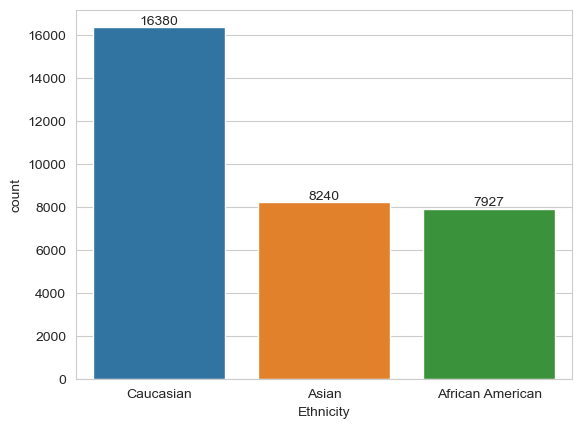

In [32]:
ax = sns.countplot(x = df['Ethnicity'],
                  order = df['Ethnicity'].value_counts(ascending  = False).index);

abs_values= df['Ethnicity'].value_counts(ascending  = False).values

ax.bar_label(container = ax.containers[0], labels = abs_values);

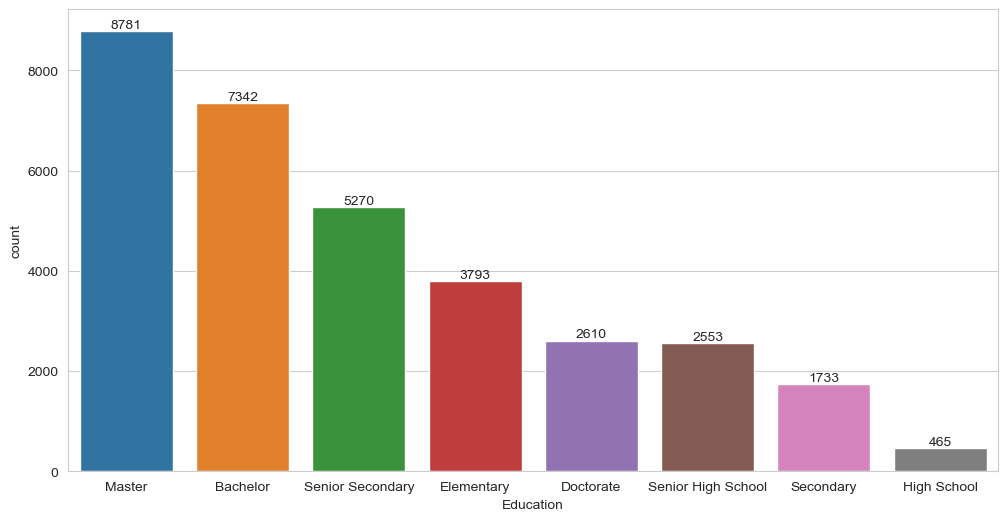

In [33]:
fig= plt.figure(figsize=(12,6))

ax = sns.countplot(x = df["Education"],
                   order = df['Education'].value_counts(ascending = False).index);
abs_values = df['Education'].value_counts(ascending = False).values

ax.bar_label(container = ax.containers[0], labels = abs_values);

plt.show()

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Univariate Analysis on Continuous Variables

In [34]:
cont_vars

['Income', 'Limit', 'Rating', 'Cards', 'Balance', 'Age']

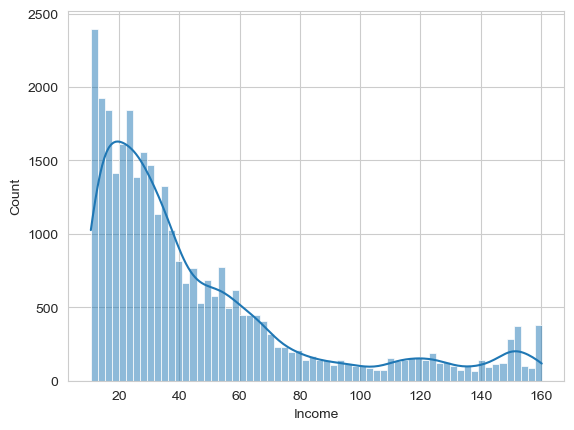

In [35]:
sns.histplot(df['Income'],kde=True);

<Axes: >

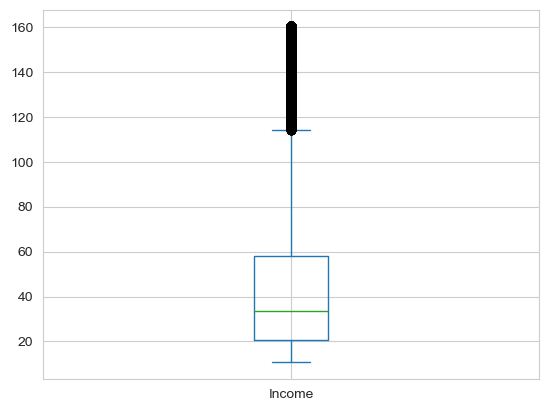

In [36]:
df['Income'].plot(kind = 'box')

<Axes: >

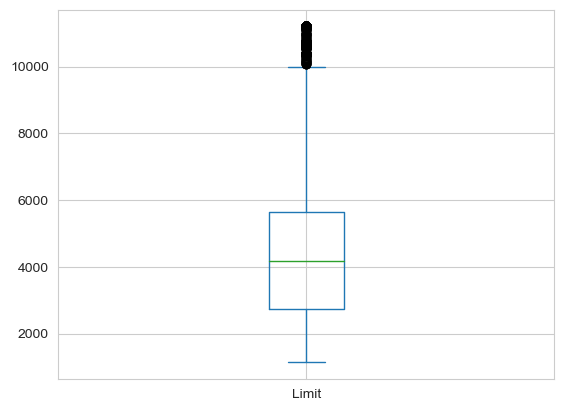

In [37]:
df['Limit'].plot(kind = 'box')

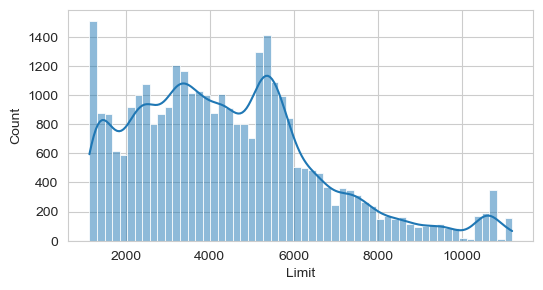

In [38]:
fig = plt.figure(figsize=(6,3))
sns.histplot(df['Limit'],kde = True)
plt.show();

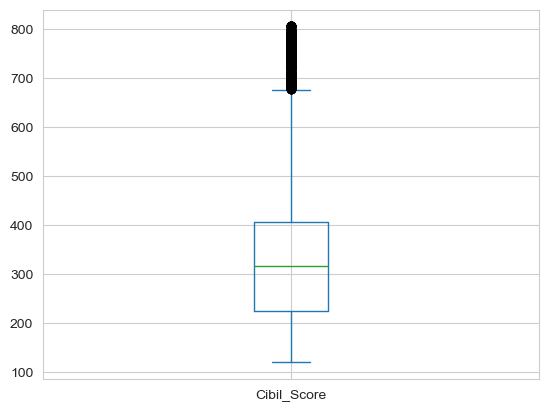

In [39]:
df['Cibil_Score'].plot(kind = 'box');

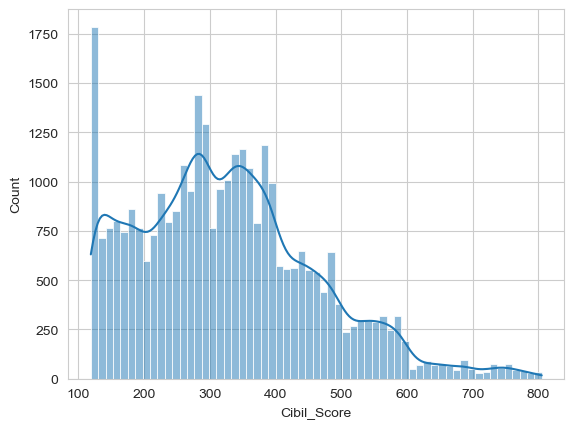

In [40]:
sns.histplot(df['Cibil_Score'], kde = True);

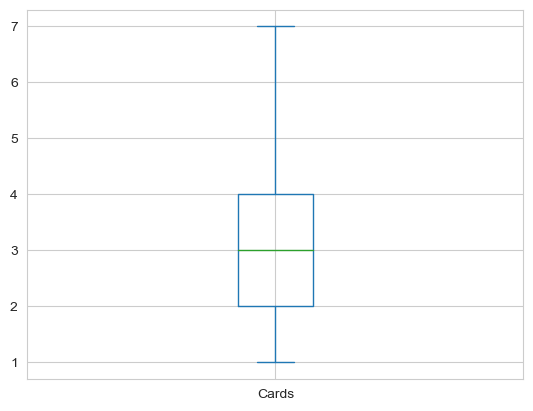

In [41]:
df['Cards'].plot(kind = 'box');

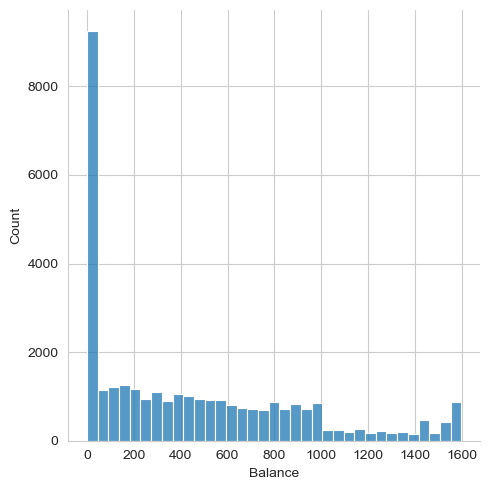

In [42]:
sns.displot(df['Balance']);

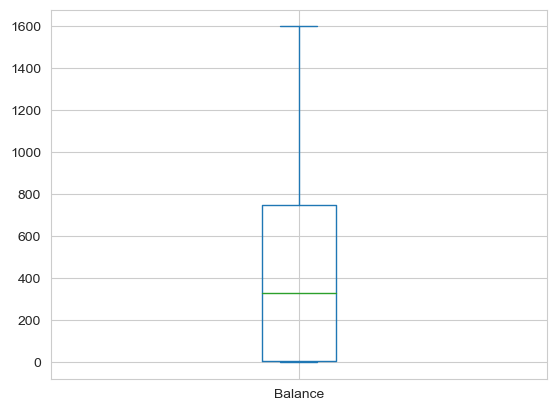

In [43]:
df['Balance'].plot(kind = 'box');

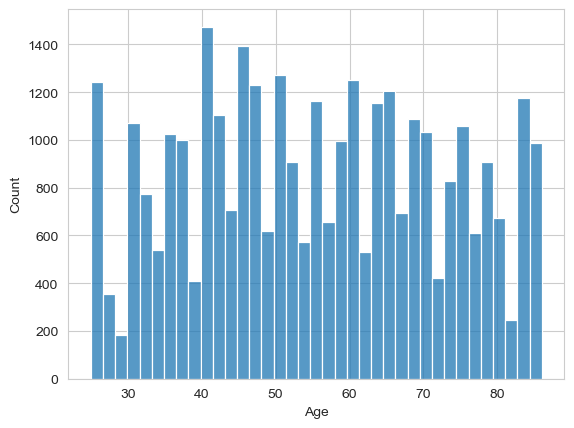

In [44]:
sns.histplot(df['Age']);

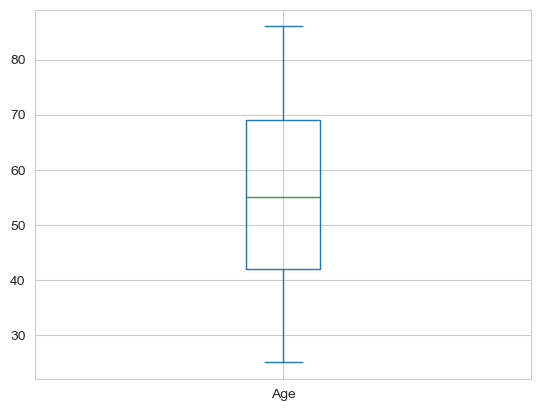

In [45]:
df['Age'].plot(kind = 'box');

### *************************************************************************************************************************************

# Bivariate Analysis

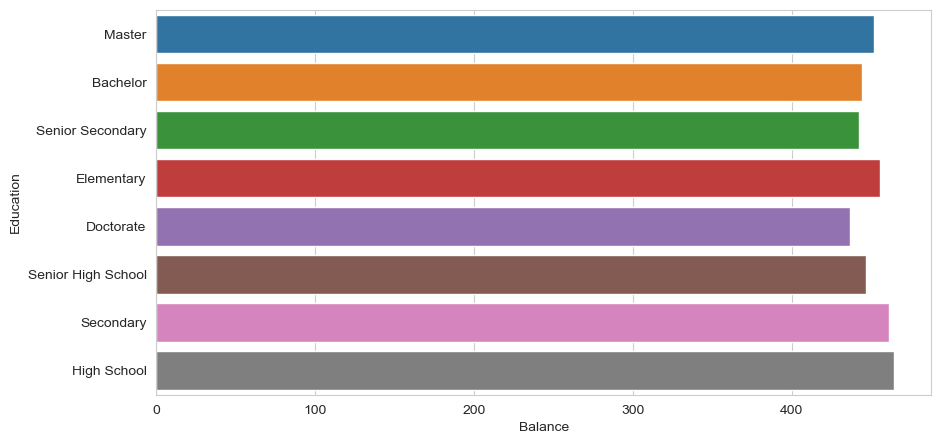

In [46]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Balance', y = 'Education', data = df,errorbar = None,
            order = df['Education'].value_counts(ascending = False).index);
abs_values = df['Education'].value_counts(ascending = False).values

ax.bar_label(container = ax.containers[0], labels = abs_values);

plt.show()

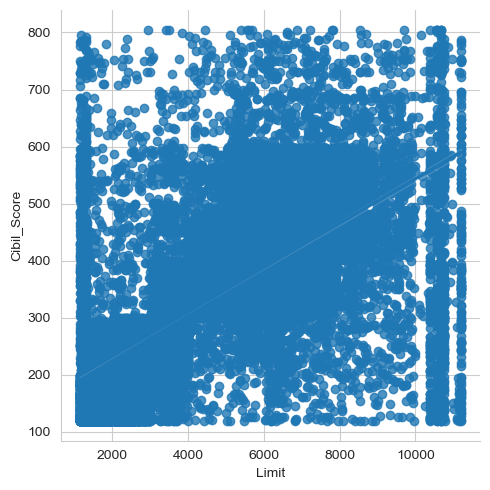

In [47]:
sns.lmplot(y = 'Cibil_Score', x = "Limit", data = df)

## There seems to be some correlation between Cibil_Score and Limit Variable.

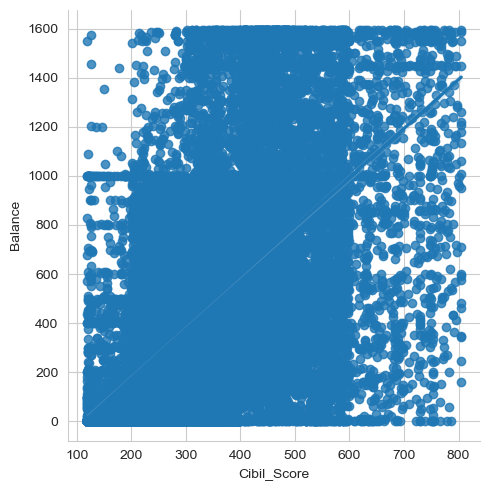

In [48]:
sns.lmplot(y = 'Balance', x = 'Cibil_Score', data  = df);

## Balance and Cibil_Score also has some good correlation.

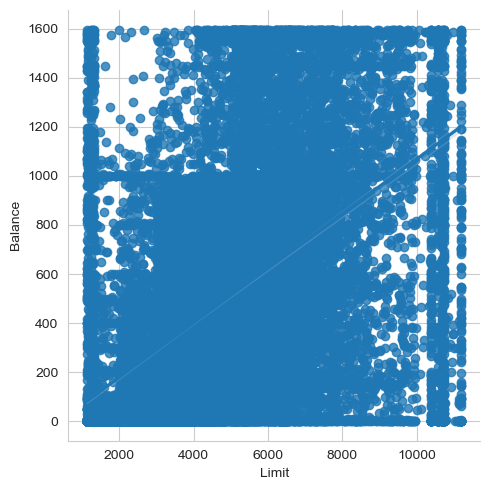

In [49]:
sns.lmplot(y = 'Balance', x = 'Limit', data  = df);

## Looks Limit and Balance are highly correlated.
## We will confirm that while doing Multivariate analysis.

In [50]:
cat_vars

['Marital_Status', 'Gender', 'Ethnicity', 'Education']

In [51]:
cont_vars

['Income', 'Limit', 'Rating', 'Cards', 'Balance', 'Age']

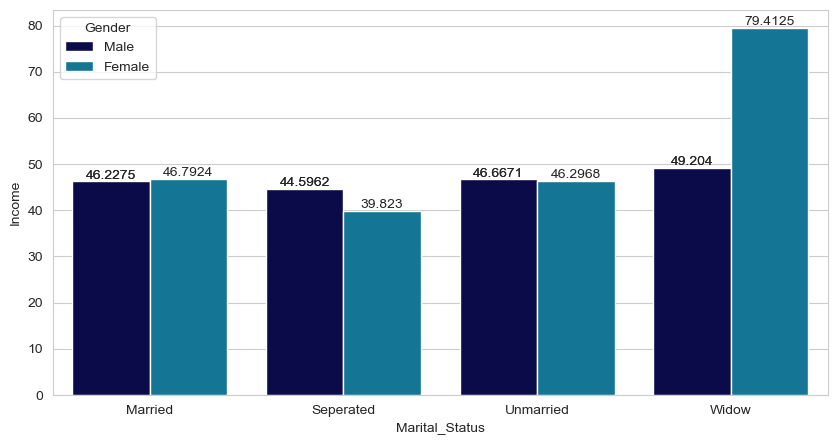

In [52]:
# Comparison between genders based on Income and Marital_Status
plt.figure(figsize = (10, 5))
ax = sns.barplot(y = 'Income', x = 'Marital_Status', data = df, hue= 'Gender', errorbar = None, palette = 'ocean')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);
plt.show();   

## On an average femal widows have higher income levels.

###### ***************************************************************************************************************************************************************************

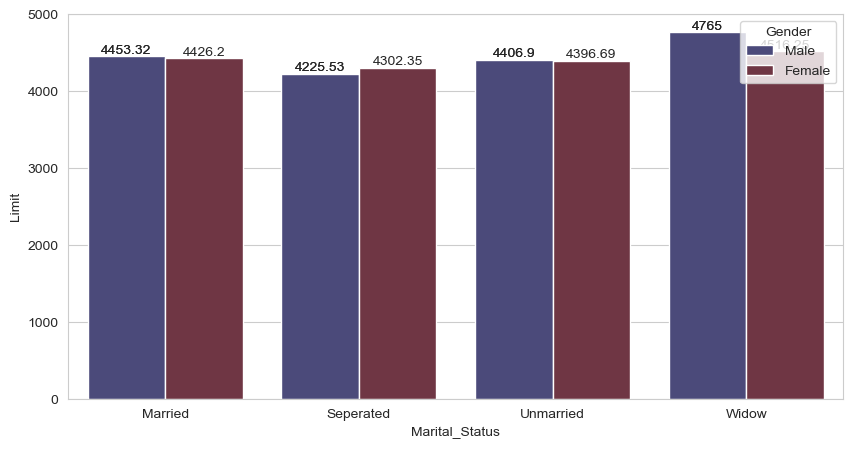

In [53]:
# Comparison between genders based on Limit and Marital_Status
plt.figure(figsize = (10, 5))
ax = sns.barplot(y = 'Limit', x = 'Marital_Status', data = df, hue= 'Gender', errorbar = None, palette = 'icefire')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

## It is evident that male widows have higher credit limit.

###### ***************************************************************************************************************************************************************************

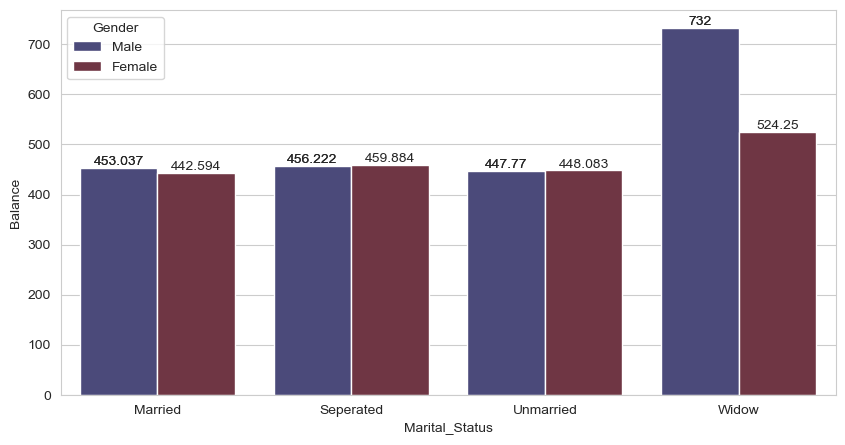

In [54]:
# Comparison between genders based on Balance and Marital_Status
plt.figure(figsize = (10, 5))
ax = sns.barplot(y = 'Balance', x = 'Marital_Status', data = df, hue= 'Gender', errorbar = None, palette = 'icefire')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

## Widows(Male) have higher balance as compared to others.

##### ===================================================================================================================

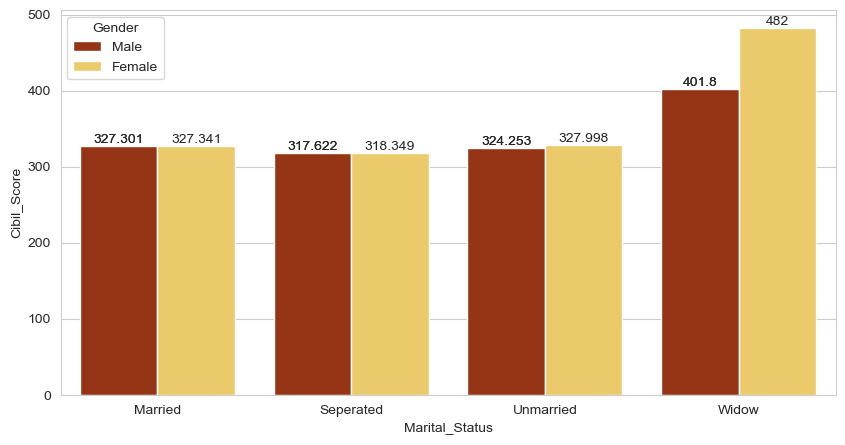

In [55]:
# Comparison between genders based on Cibil_Score and Marital_Status
plt.figure(figsize = (10, 5))
ax = sns.barplot(y = 'Cibil_Score', x = 'Marital_Status', data = df, hue= 'Gender', errorbar = None, palette = 'afmhot')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

## Widows(female) have better Cibil_Score. 

##### **************************************************************************************************************************************************************************

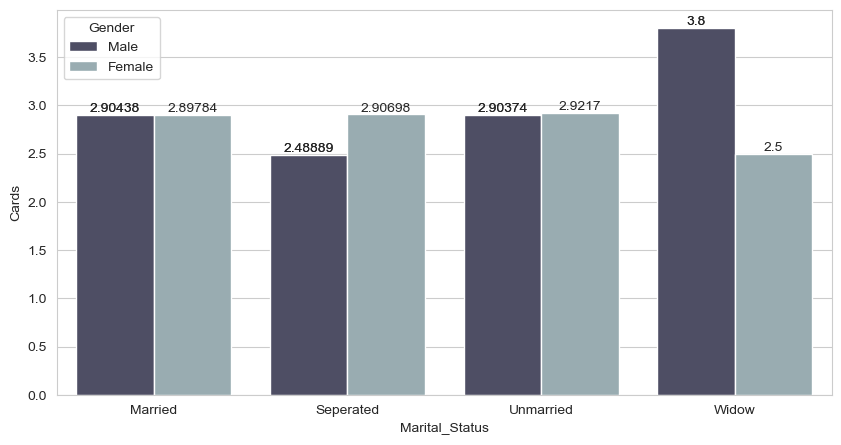

In [56]:
# Comparison between genders based on Cards and Marital_Status
plt.figure(figsize = (10, 5))
ax = sns.barplot(y = 'Cards', x = 'Marital_Status', data = df, hue= 'Gender', errorbar = None, palette = 'bone')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);
plt.show();

## Widows(male) tend to have more number of credit cards.

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

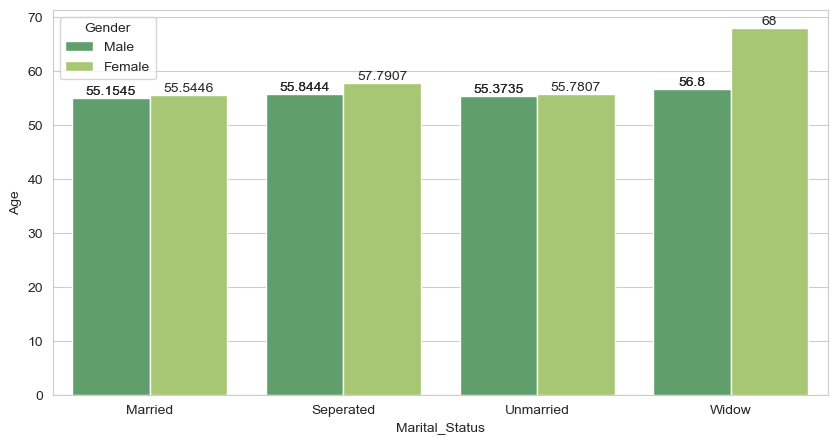

In [57]:
# Comparison between genders based on Age and Marital_Status
plt.figure(figsize = (10,5))
ax = sns.barplot(y = 'Age', x = 'Marital_Status', data = df, hue= 'Gender', errorbar = None, palette = 'summer')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);

## Widows(female) are the oldest.


#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## From all the above graphs we can infer that:
### ->Widow's have better Balance, Income and a very good Cibil_Score(Rating) in all the segments.

## Multivariate Analysis

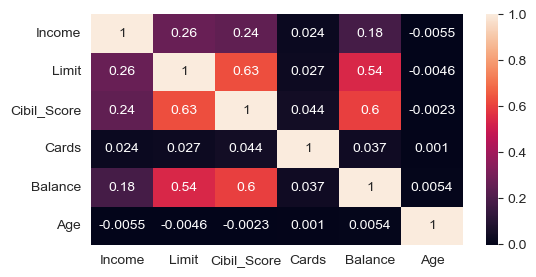

In [58]:
plt.figure(figsize = (6,3))
sns.heatmap(df.corr(), annot = True)
plt.show();

In [59]:
df_num = df.select_dtypes(include= ['float64', "int64"])

In [60]:
df_num_corr = df_num.corr()['Limit'][:-1] # -1 because the latest row is Limit
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Limit:\n{}".format(len(golden_features_list), golden_features_list))

There are 3 strongly correlated values with Limit:
Limit          1.000000
Cibil_Score    0.629210
Balance        0.539445
Name: Limit, dtype: float64



**Inferences:**

 **> Limit is highly corelated to Rating and Balance**